## Exponentially Weighted Smoothing
<br>  
**Objectives**  
- Implement EWM algorithm manually
- Learn how to use pandas EWM methods
- Analyze and evaluate EWM

**quick review of lec05**


**quick review of tut05**  
1. return evenly spaced samples   
`np.linspace(start, stop, amount)`  


2. linear regression with sklearn library  
`LinearRegression()`  
`lm.fit(x, y)`  
`lm.predict(x)`  
`lm.coef_`  
`lm.intercept_`   


3. create dummy variables  
`pd.get_dummies(drop_first = True)`    

### 1. Exponential weighted smoothing
Let's start with the exponential weighted smoothing.
The component from of EWM is defined as:
$$\widehat{y_{t+1|1:t}} = l_t = \alpha y_t + (1-\alpha)l_{t-1}$$  
where $0 \leq \alpha \leq 1$.  

Here, we first calculate the level $𝑙_t$ and then use it as the forecast $\widehat{y_{t+1|1:t}}$. 
Continue the calculation steps:
$$l_{t-1} = \alpha y_{t-1} + (1-\alpha)l_{t-2}$$  
$$l_{t-2} = \alpha y_{t-2} + (1-\alpha)l_{t-3}$$  
$$l_{t-3} = \alpha y_{t-3} + (1-\alpha)l_{t-4}$$  
$$...$$
$$l_2 = \alpha y_2 + (1-\alpha)l_1$$  
$$l_1 = \alpha y_1 + (1-\alpha)l_0$$  


Finally, we combine the above equations together, we will finally have:
$$
\begin{aligned} \widehat{y_{t+1 | 1 : t}}=l_{t}=& \alpha y_{t}+\alpha(1-\alpha) y_{t-1}+\alpha(1-\alpha)^{2} y_{t-2}+\cdots+\alpha(1-\alpha)^{t-1} y_{1} \\ &+(1-\alpha)^{t} l_{0} \end{aligned}
$$

You may notice in order to get the $l_t$ which is the forecast $\widehat{y_{t+1|1:t}}$, we need to define the value of $\alpha$ and $l_0$.  

However, the value of $\alpha$ and $l_0$ are sensitive to your time-series data. Inappropriate value selection will result in inaccurate forecasting results.

In this task, we will calculate the exponentially weighted smoothing results of `“AustralianVisitors.csv”` dataset.   
1. Firstly, we will manually smooth the data by using a self-defined function;
2. and then call `ewm()` function in pandas; 
3. Finally, we will discuss how to select the best fitting $\alpha$.   

Note that selecting the value of $l_0$ is also important. However, in this tutorial, <span class="mark">we only choose $l_0$ = $y_0$ for simplicity</span>. You can also refer to the steps of selecting $\alpha$ to select $l_0$.

#### Step 1: Load the Data
Download the `AustralianVisitors.csv` file from the QBUS6840 Canvas site.

Start by importing `pandas`, `matplotlib` and `numpy` and import the dataset:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format='retina'

In [37]:
# import dataset and setup dependent variable (y)
visitors = pd.read_csv('AustralianVisitors.csv')
y = visitors['No of Visitors'] # 312 values in total

#### Step 2: Manually smooth the data
First define the smoothing weight and create a list to store our smoothed values and fill with an initial starting point

In [38]:
# smooth weight: alpha
alpha = 0.1

# create a new list for l, start from y_1 ( = l_0)
smoothed_manual = [y[0]] # l_0

$l_t = \alpha y_t + (1 - \alpha)  l_{t-1}$

In [ ]:
# l = [l0]
# y = [y1, y2, ..., y_t, ...]
# l = [l0, l1, ..., l_t_1]
# 
# # step1:
# i = 0
# l1 = alpha * y[i] + (1-alpha)*l[i]
# l = [l0, l1]
# 
# # step2:
# i = 1
# l2 = alpha * y[i] + (1-alpha)*l[i]
# l = [l0, l1, l2]

In [39]:
# iterate over the data and smooth it
for i in range(len(visitors)): # the time of iteration equals to the length of visitors (No.values within the variable)
    # equation: l_t = alpha * y_t + (1-alpha) * l_(t-1)
    smoothed_manual.append(alpha * y[i] + (1 - alpha) * smoothed_manual[i])
    # list.append(a): append 'a' at the end of the list

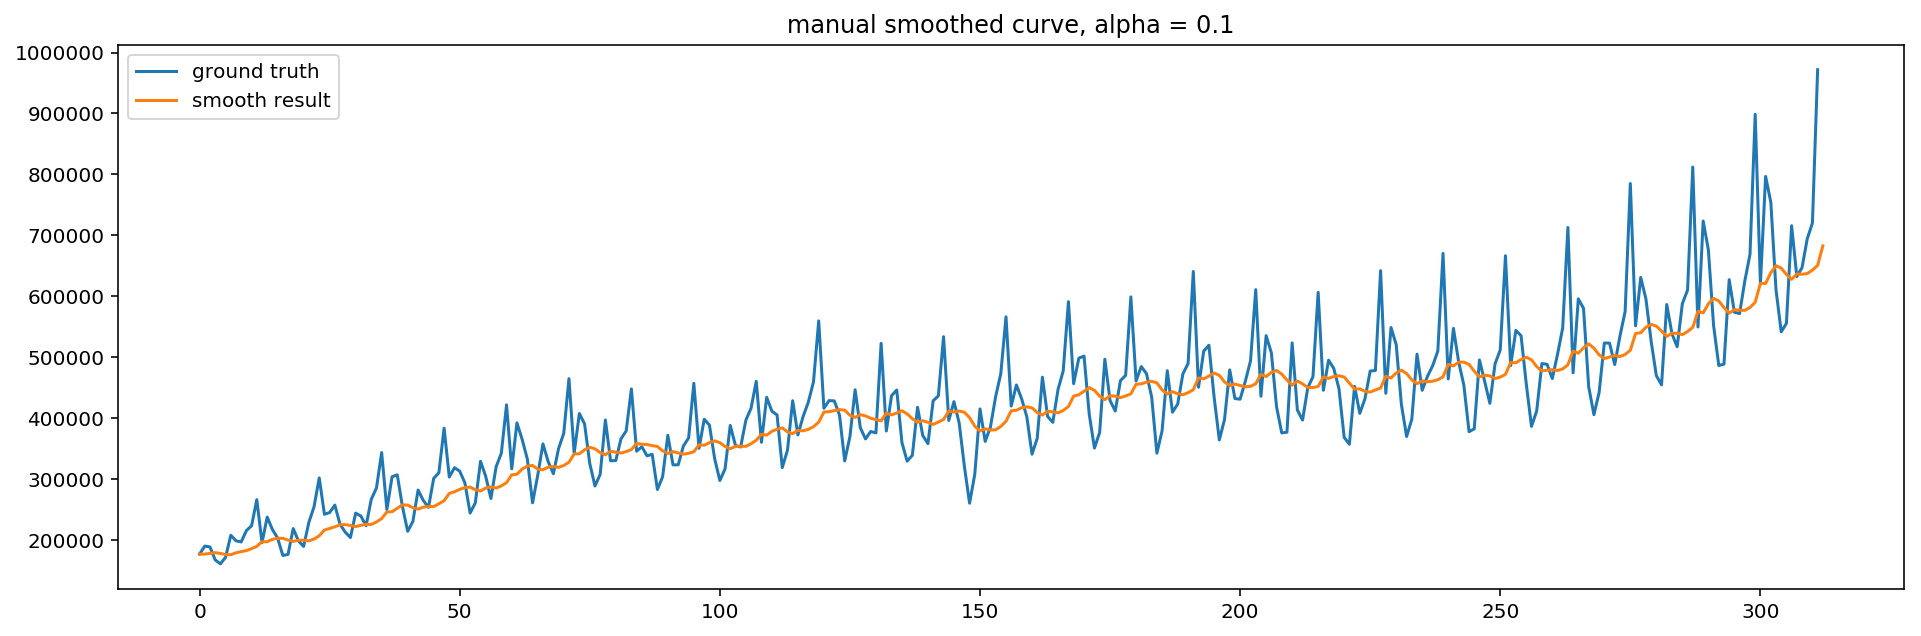

In [40]:
# Plot your manual smoothed curve by using plt.plot() funciton
fig = plt.figure(figsize = (16, 5))
plt.plot(y, label = 'ground truth')
plt.plot(smoothed_manual, label = 'smooth result')
plt.legend()
plt.title("manual smoothed curve, alpha = 0.1");

Can you set $l_0 = \frac{(y_1 + y_2 + y_3)}{3}$ and redo the smoothing?  
Could you find any difference for difference choice of $l_0$ values?

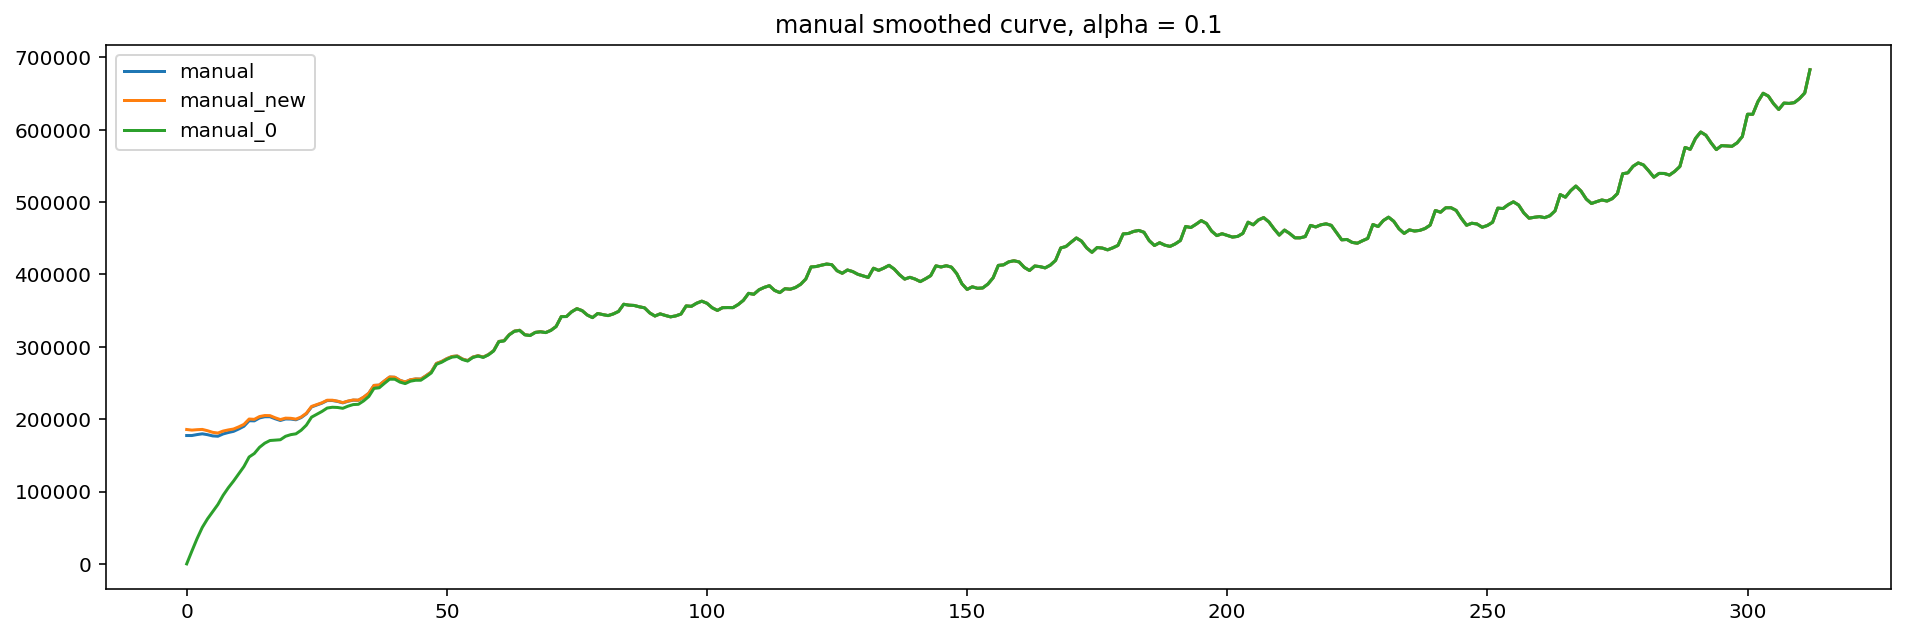

In [6]:
smoothed_manual_1 = [(y[0] + y[1] + y[2])/3] # try avg(y1:3)
smoothed_manual_2 = [0] # try 0

for i in range(len(visitors)): # the time of iteration equals to the length of visitors (No.values within the variable)
    # equation: l_t = alpha * y_t + (1-alpha) * l_(t-1)
    smoothed_manual_1.append(alpha * y[i] + (1 - alpha)*smoothed_manual_1[i])
    smoothed_manual_2.append(alpha * y[i] + (1 - alpha)*smoothed_manual_2[i])

fig = plt.figure(figsize = (16, 5))
plt.plot(smoothed_manual, label = 'manual')
plt.plot(smoothed_manual_1, label = 'manual_new')
plt.plot(smoothed_manual_2, label = 'manual_0')
plt.title("manual smoothed curve, alpha = 0.1")
plt.legend();

# try to explain...
# hint: check the formula at P12, lecture 5

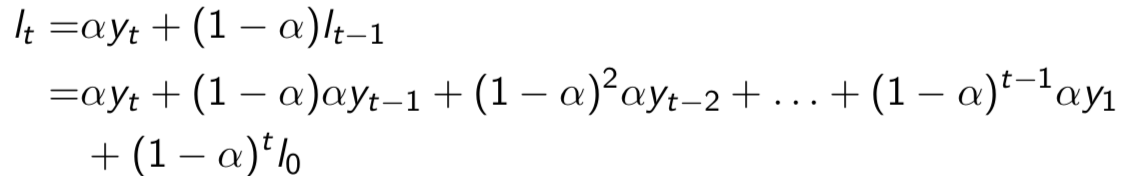

#### Step 3: Smooth the data using Pandas
We can use the Pandas EWM function to smooth the data automatically:   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [7]:
# try smoothed result with different alpha values
smoothed1 = y.ewm(alpha = 0.05, adjust = False).mean()
smoothed2 = y.ewm(alpha = 0.1, adjust = False).mean()
smoothed3 = y.ewm(alpha = 0.3, adjust = False).mean()
smoothed4 = y.ewm(alpha = 0.7, adjust = False).mean()
# adjust controls two different variants of exponential weights
# the formula we introduced in class use the method with 'adjust = False'

Plot and compare the different values of alpha. Start by creating a new figure and saving a reference to it. We will use the figure reference to save the figure to an image file later.

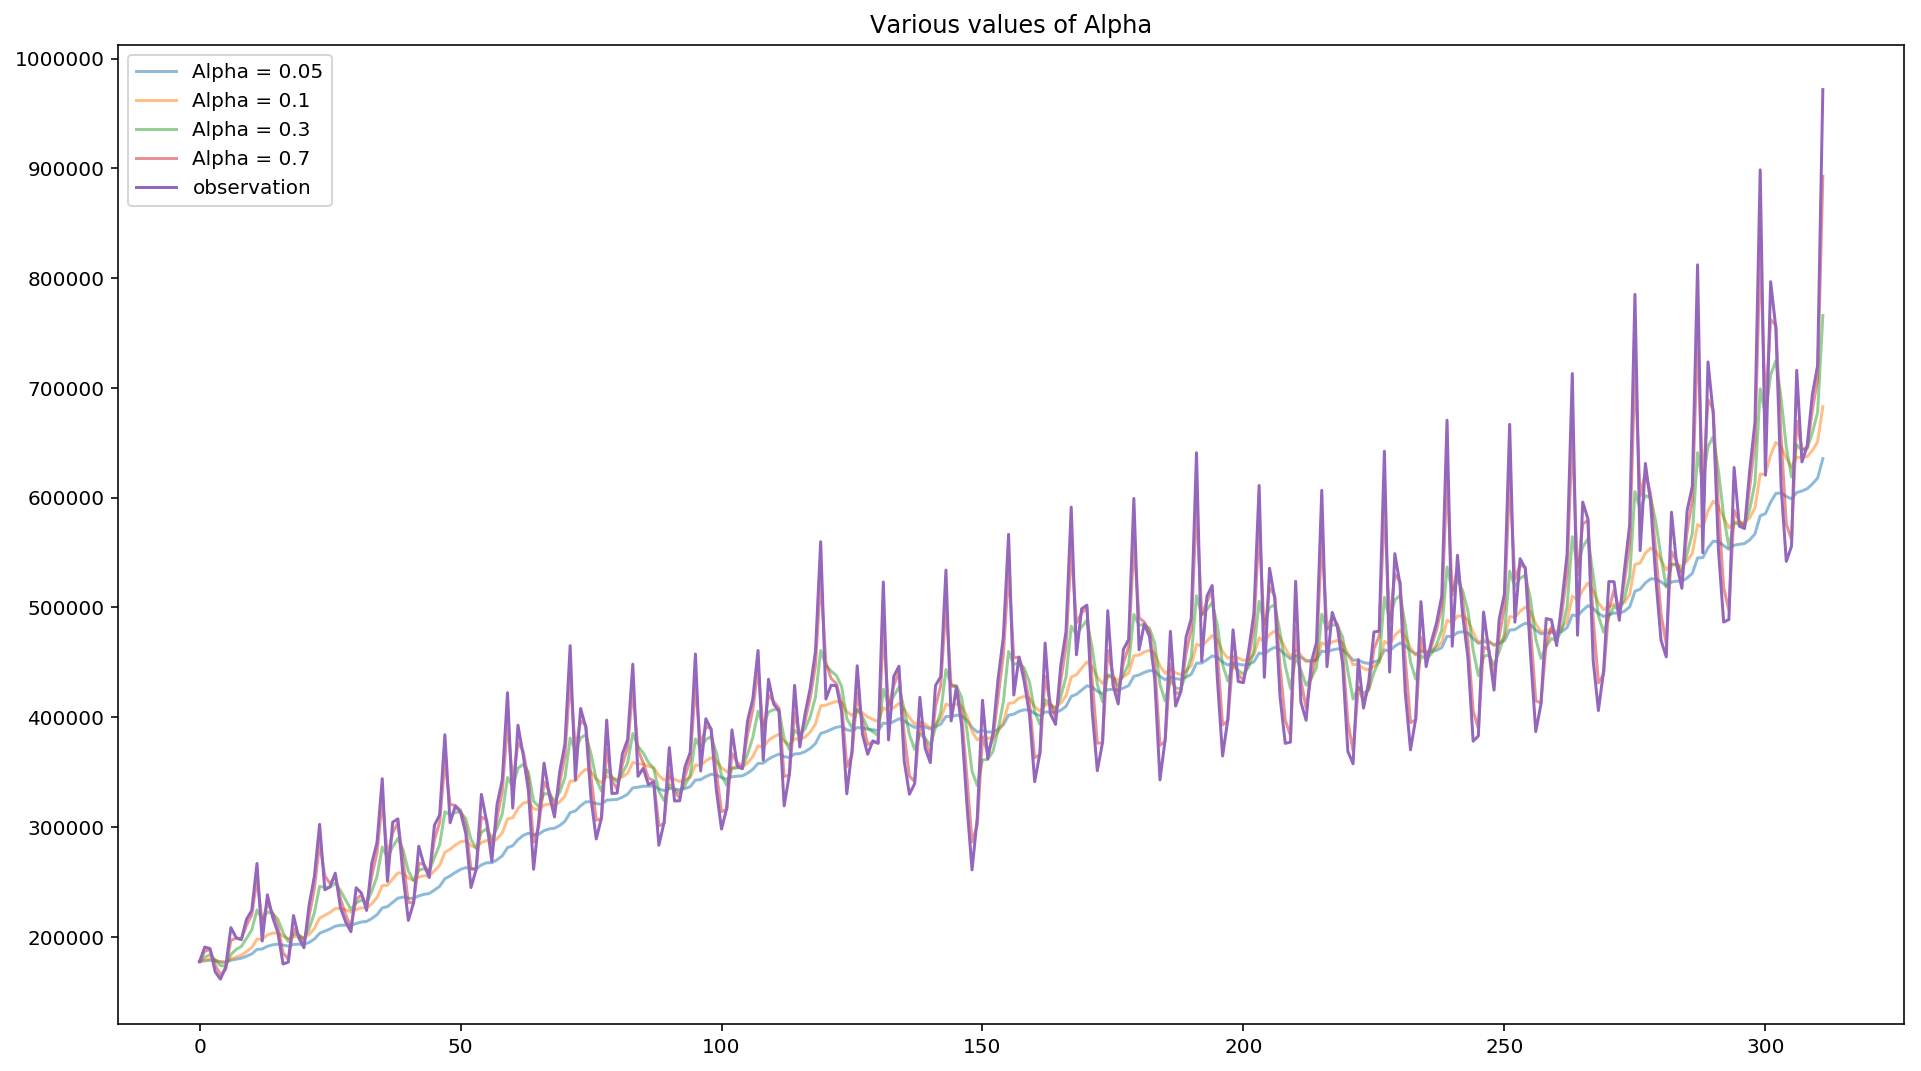

In [42]:
fig = plt.figure(figsize = (16, 9))
plt.plot(smoothed1, alpha = 0.5, label = "Alpha = 0.05")
plt.plot(smoothed2, alpha = 0.5, label = "Alpha = 0.1")
plt.plot(smoothed3, alpha = 0.5, label = "Alpha = 0.3")
plt.plot(smoothed4, alpha = 0.5, label = "Alpha = 0.7")
plt.plot(y, label = 'observation')
plt.title("Various values of Alpha")
# enable the legend and move it to the top left corner
plt.legend(loc = "upper left")
# finish the plot
plt.show(block = False)
# save the plot to an image file
fig.savefig("Alpha.pdf") # you might use this line to generate high-quality plots for your assignment
# remember 'fig = ' in the first line

Compare your manually smoothed result with ewm function result (with alpha = 0.1), what differences could you observe?

In [9]:
# p14, lecture 5: 
# 'Low α reveals trend-cycle; Higher α reveals seasonality'

# reason?
#     smaller alpha means we put more weights on historical data, 
#     while larger alpha gives more weights on the last observed data

In this example, we have used different 𝛼 values, say 0.05, 0.1, 0.3, and 0.7. Can you also call ewm() function with 𝛼 equals to 0 and 1 respectively? What is the curve looks like?

Generally, for these 2 extreme cases:
- <span class="burk">𝛼 = 0: the forecasts of all future values are equal to the <span class="girk">average (or “mean”) of the historical data</span>, which is called average method.</span>
- 𝛼 = 1: simply set all forecasts to be the value of the last observation, which is called <span class="girk">Naive method</span> in statistics.

If you can't understand this, please go back and review the equations in the beginning.

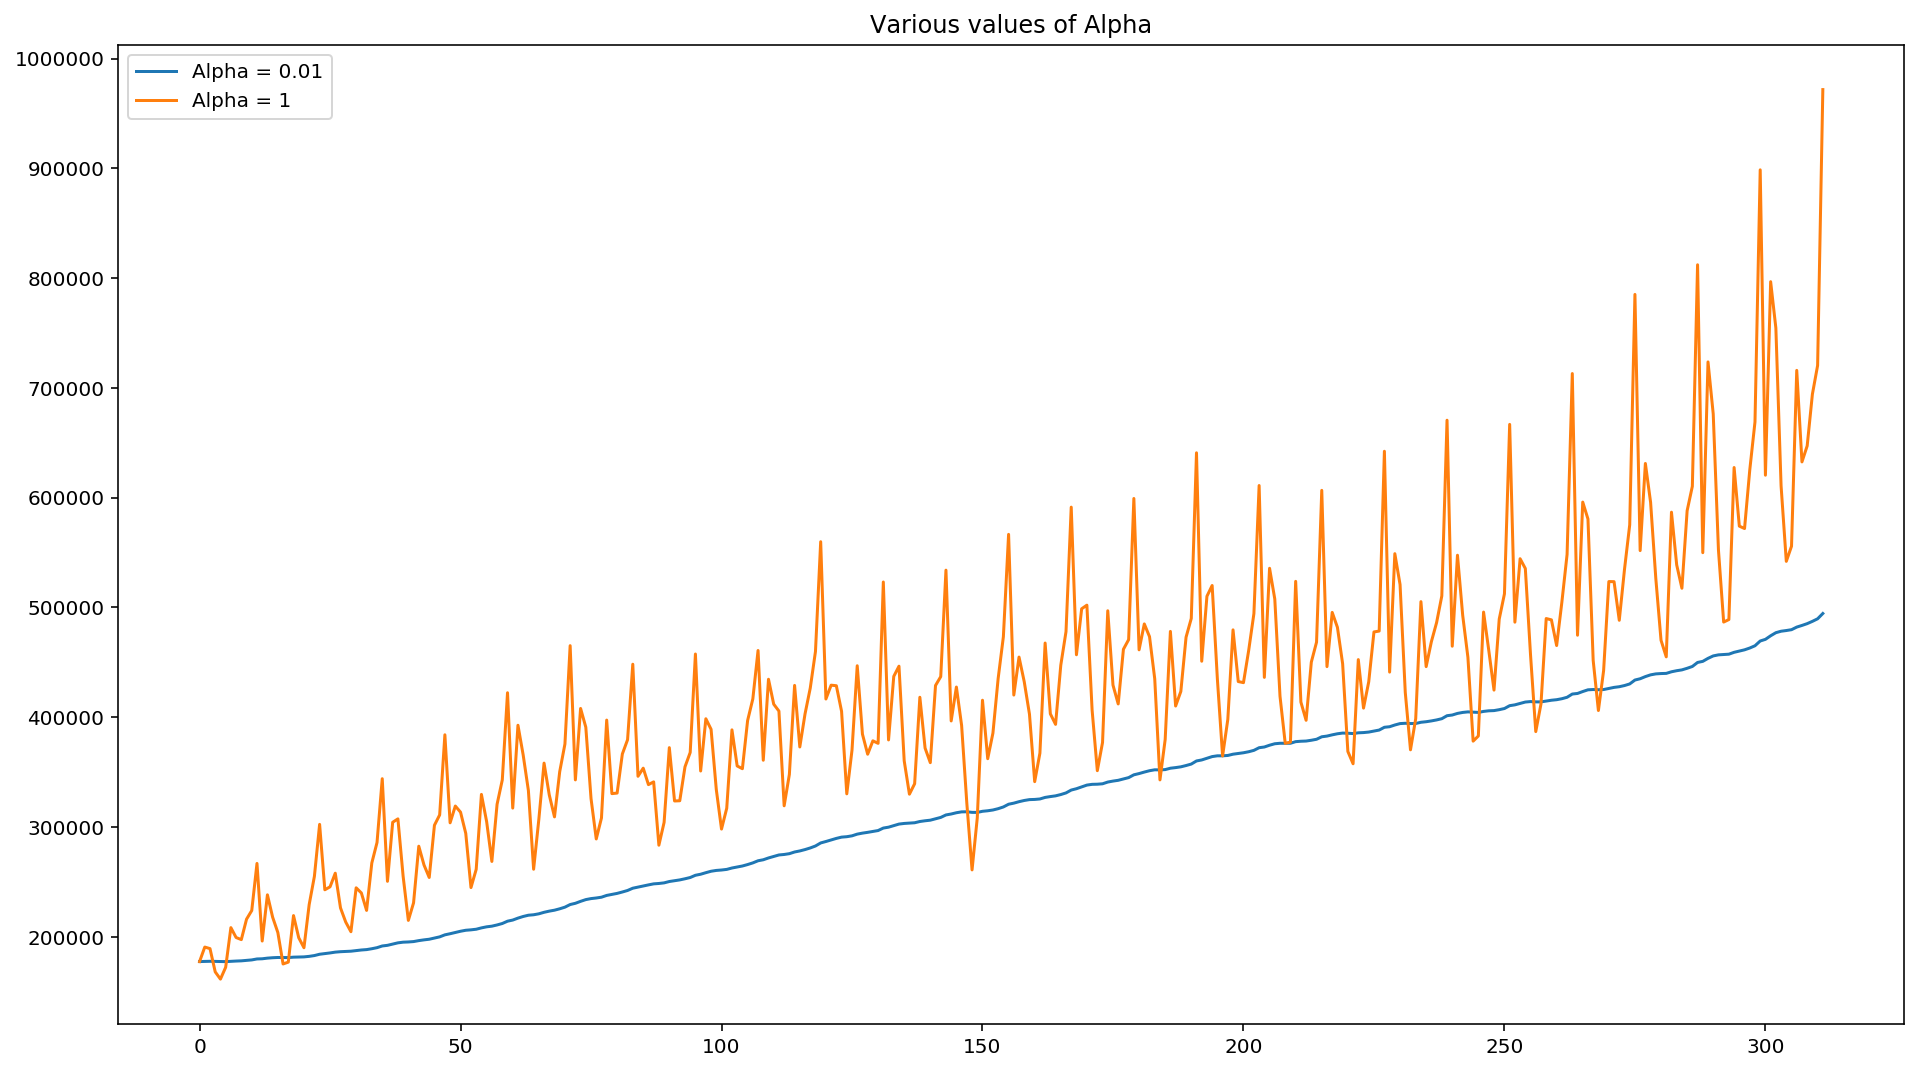

In [10]:
# alpha = 0: all future values equals to l_0 (in this case: y_1)
smoothed5 = y.ewm(alpha = 0.01, adjust = False).mean() # you can try different alpha
smoothed6 = y.ewm(alpha = 1, adjust = False).mean() # you can try different alpha

plt.figure(figsize = (16, 9))
plt.plot(smoothed5, label = "Alpha = 0.01")
plt.plot(smoothed6, label = "Alpha = 1")
plt.title("Various values of Alpha")
# enable the legend and move it to the top left corner
plt.legend(loc = "upper left");

#### Step 4: Find the optimal value of alpha for 1-step smoothing
We can do a grid search over a range of possible alpha values to select the alpha that produces the least error.

First define a function to calculate the SSE to measure the error

In [ ]:
# [x1, x2]
# [y1, y2]
# 
# 1. [x1-y1, x2-y2]
# 2. [(x1-y1)**2, (x2-y2)**2]
# 3. (x1-y1)**2 + (x2-y2)**2

In [11]:
def sse(x, y): # sse: sum of squared error
    return np.sum(np.power(x - y, 2))
# np.power(a,b) = a**b

# a^2: np.power(a,2)
# a^3: np.power(a,3)
#     .....

Then create an empty list to store SSE scores and a range of alpha values to iterate over

In [43]:
sse_one = []
alphas = np.arange(0.01,1,0.01) # remeber the difference between np.arange and np.linspace?
# question: how many alphas do we have?

In [59]:
len(np.arange(0.01,1,0.01))
# 0.01 -> model_1 -> seq_l1 -> sse1
# 0.02 -> model_2 -> seq_l2 -> sse2

99

Use your variable explorer to check variable alphas. Then test each alpha value in turn.

In [46]:
for i in alphas:
    # calculate ewm result for each of the alpha
    smoothed = y.ewm(alpha = i, adjust=False).mean() 
    # smoothed = [l_1, l_2, ..., l_t]
    
    # and the sse value for each of them
    sse_one.append(sse(smoothed[:-1], y.values[1:])) 
    
    # one_step_prediction
    #     smoothed[:-1] = [l_1, l_2, ..., l_t-1]
    # true_value:
    #     y_value[1:] = [y_2, y_3, ..., y_t]
    # sse:
    #     y_2 - l_1, y_3 - l_2, .., y_t - l_t-1

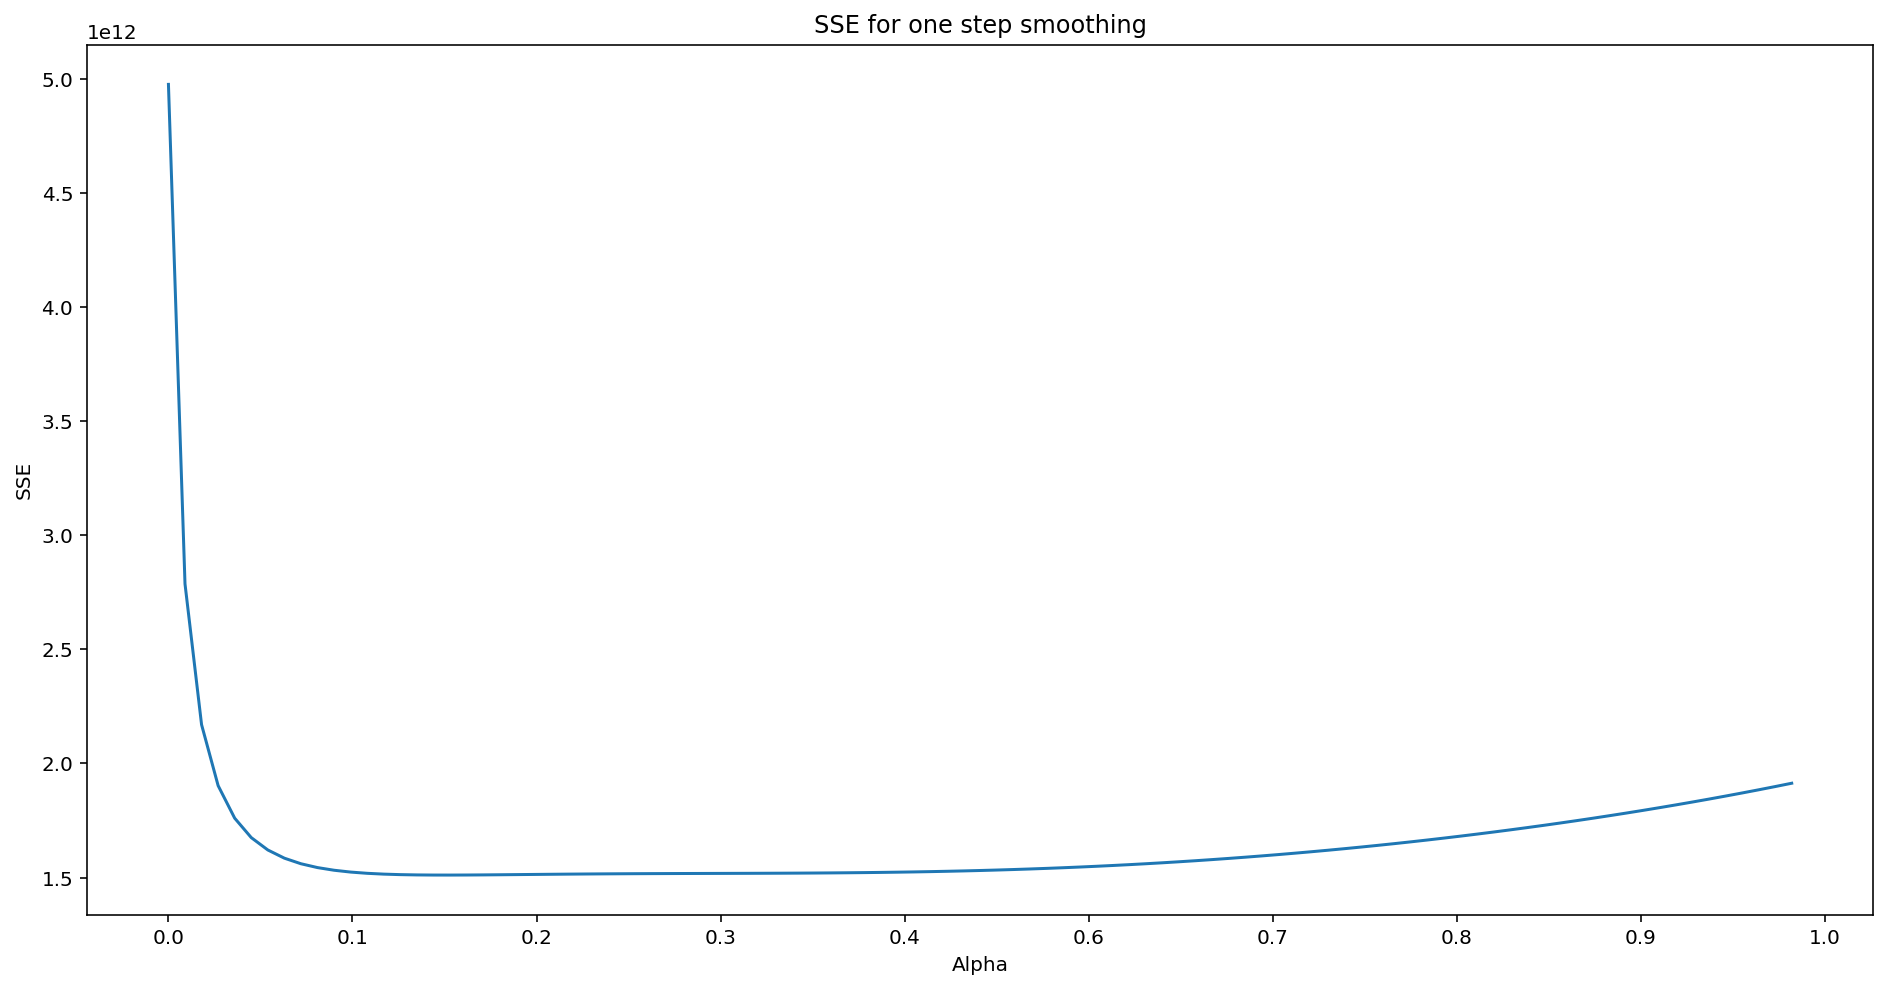

In [14]:
# Let’s plot the SSE vs Alpha
plt.figure(figsize = (16,8))
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
# set the numbers on the x-axis: plt.xticks(location, label)
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.show(block=False)

What is the size of `smoothed` and `sse_one`?



In [15]:
# size of smoothed = the number of observations (X)
print('size of smoothed: {}'.format(np.shape(smoothed)))

# size of sse = the number of SSE values = the number of alphas
print('size of sse_one: {}'.format(np.shape(sse_one)))

size of smoothed: (312,)
size of sse_one: (99,)


Find the best fitting alpha based on the minimum SSE. Here you can use `np.argmin()` function

In [50]:
# np.argmin(sse_one) # loc=17; 18th result
# alphas[17]

17

In [16]:
# the best alpha is the one that minimise sse_one
# alphas[np.argmin(A)]: the argument (alpha) that minimise A
optimal_alpha_one = alphas[np.argmin(sse_one)] 
print("Optimal Alpha for 1-step forecast {:.4f}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.1800


#### Step 5: Find the optimal value of alpha for 2-step smoothing
To calculate the optimal alpha for a 2-step ahead forecasting, we can shift smoothed series by two time units. This can be achieved by making error between the third value in the original and the first in the smoothed, the 4th in original and the second smoothed value and so on.

In [17]:
sse_two = []
alphas = np.arange(0.01,1,0.01)

for i in alphas:
    smoothed = y.ewm(alpha = i, adjust=False).mean() # l_1 : l_t
    sse_two.append(sse(smoothed[:-2], y.values[2:])) 
    # the only difference: sse_one.append(sse(smoothed[:-1], y.values[1:])) 
            
    # two_step_prediction
    #     smoothed[:-2] = [l_1, l_2, ..., l_t-2]
    # true_value:
    #     y_value[2:] = [y_3, y_4, ..., y_t]
    # sse:
    #     y_3 - l_1, y_4 - l_2, .., y_t - l_t-2

**Question**:   
What is the meaning of `smoothed[:-2]`?

What is the size of `smoothed` and `sse_two`?

In [19]:
print('size of smoothed: {}'.format(np.shape(smoothed)))
print('size of sse_two: {}'.format(np.shape(sse_two)))

size of smoothed: (312,)
size of sse_two: (99,)


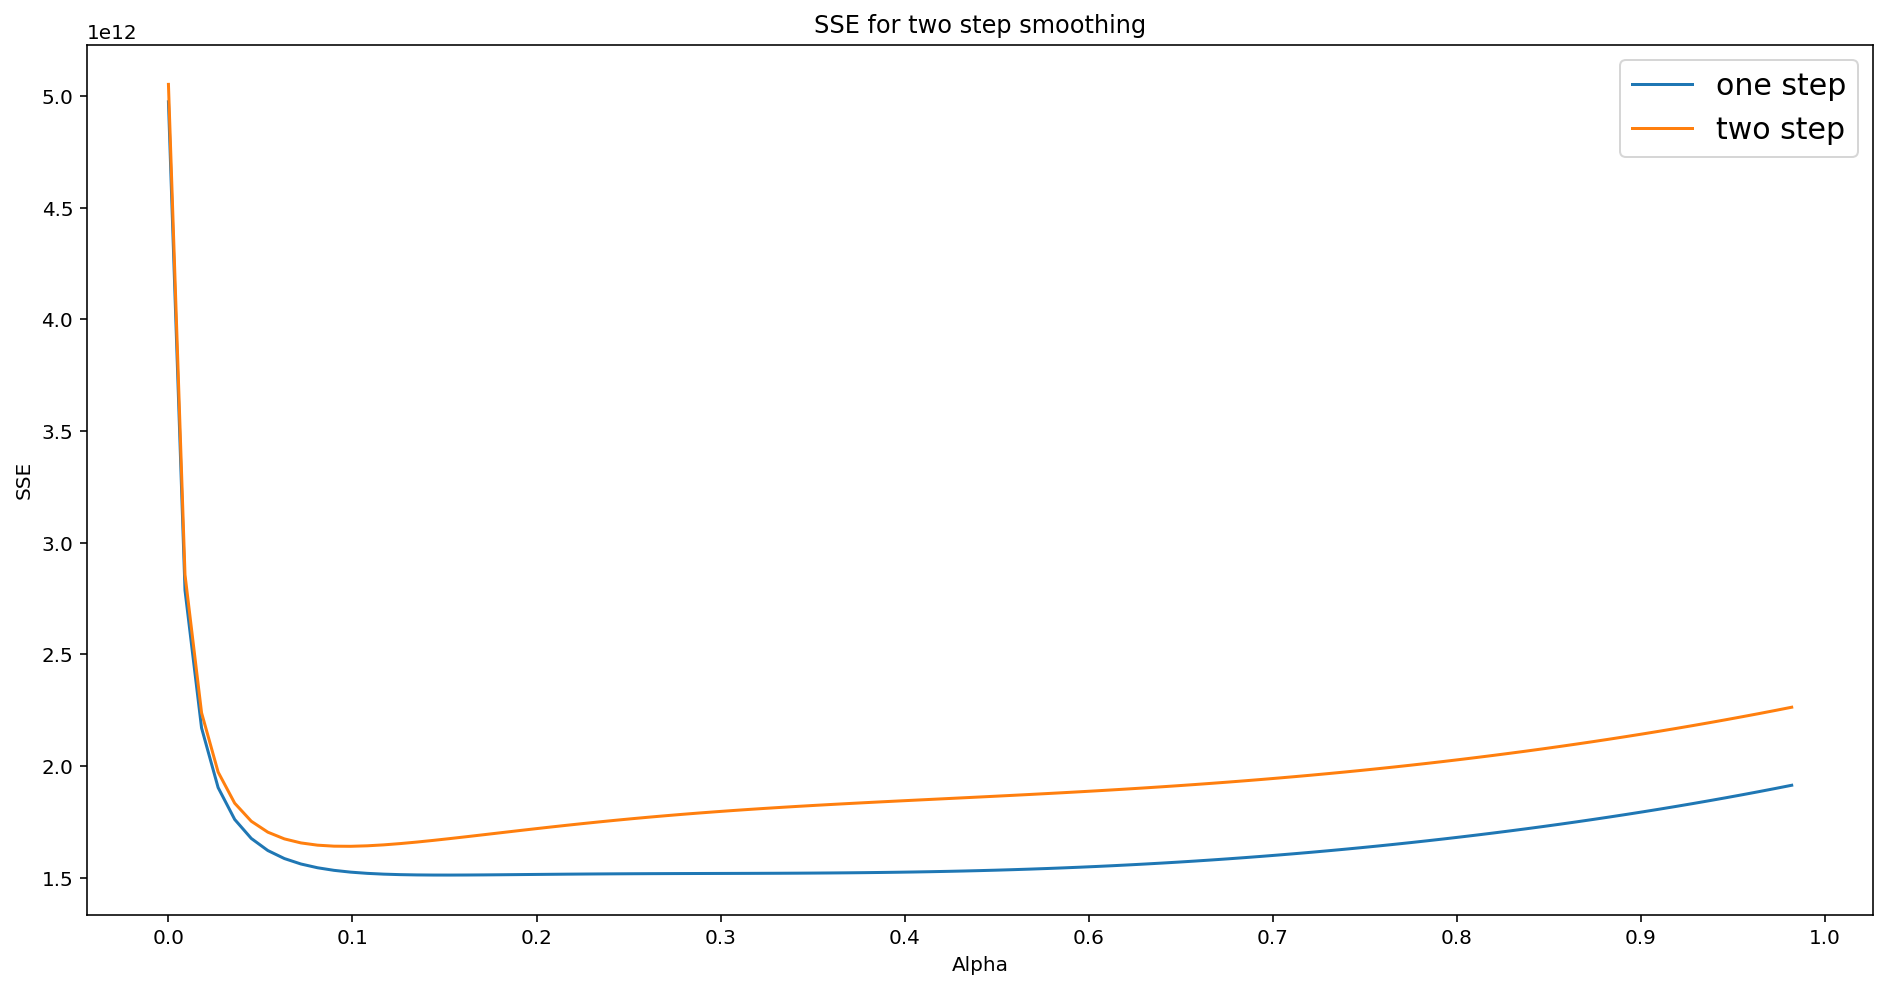

In [20]:
# Then plot the SSE vs Alpha and find the best fitting alpha.
plt.figure(figsize = (16, 8))
plt.plot(sse_one, label = 'one step')
plt.plot(sse_two, label = 'two step')
plt.title("SSE for two step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.legend(fontsize = 15)
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.show(block = False)

In [21]:
optimal_alpha_two = alphas[np.argmin(sse_two)]
print("Optimal Alpha for 2-step forecast {0:.4f}".format(optimal_alpha_two))

Optimal Alpha for 2-step forecast 0.1200


### 2. Trend method
In this task, we will implement the trend method for smoothing, more specifically, Holt’s linear method.

In the simple exponential smoothing task, we set level 𝑙" as the forecast result, which is:
$$\widehat{y_{t+1|1:t}} = l_t$$ 
Compared with the previous method, Holt’s linear method forecast the results by combining the level and trend.

In general, the Forecast equation in Holt’s linear method is defined:
$$\widehat{y_{t+1|1:t}} = l_t + hb_t$$ 

where the level is:
$$l_t = \alpha y_t + (1-\alpha)(l_{t-1} + b_{t-1})$$ 
and the trend is:
$$b_t = \beta (l_t - l_{t-1}) + (1-\beta)b_{t-1}$$ 

For one-step forecast, we have ℎ = 1, which is:
$$\widehat{y_{t+1|1:t}} = l_t + b_t$$ 
$$\widehat{y_{t+1|1:t}} = \alpha y_t + (1-\alpha)(l_{t-1} + b_{t-1}) + \beta (l_t - l_{t-1}) + (1-\beta)b_{t-1}$$ 
where 0 ≤ 𝛼 ≤ 1 and 0 ≤ 𝛽 ≤ 1.

Note that similar with simple exponential smoothing, you still need to define the value of hyper parameters, i.e. 𝛼 and 𝛽.

For this task, we will still use the `“AustralianVisitors.csv”` dataset.

Firstly, define the smoothing weight $\alpha$ and $\beta$. Then we initialize the $l_0 = y_1$ and $𝑏_0 = 𝑦_2 − 𝑦_1$ and create a list `holtsmoothed_manual` to store our smoothed values

In [22]:
alpha = 0.1
beta = 0.1

l = [y[0]] # l_0 = y_1
b = [y[1] - y[0]] # b_0 = y_2 - y_1

# holtsmoothed_manual1 = [l[0] + b[0]] # y_hat = l_0 + b_0

# Y: store the intermediate information
Y = y.tolist() # series to list

For one-step forecast, we have ℎ = 1, which is:
$$\widehat{y_{t+1|1:t}} = l_t + b_t$$ 

Iterate the data and smooth/forecast the data. Here, we are going to <span class="girk">forecast 12 more months after the last observation</span> (t = 312).

In [60]:
holtsforecast_manual = []
# Here, we are going to forecast 12 more months after the last observation (t = 312).
for i in range(len(y)+12):
    # when we reach the end of the original data
    # then we need to forecast the t = T:T+12
    if i == len(Y):
        Y.append(l[-1] + b[-1])
    # print(i)
    l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i]))
    b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
    # for forecasting,  
        # Y^2 = l1 + b1
        # Y^3 = l2 + b2
        # Y^4 = l3 + b3
        # ...
        # Y^t+1 = lt+bt
    holtsforecast_manual.append(l[i] + b[i])

Read the above code carefully, and answer the below question:  
1. What is the size of `Y` and `holtsmoothed_manual` **before** you run the code?  
2. What is the size of `Y` and `holtsmoothed_manual` **after** you run the code?  
3. In what cases the statements in the if condition will be executed?  
4. Report the value of the last 12 elements in the list `l` and `b`, what you could observe?

In [28]:
# the last 12 values of l and b
print('the last 12 l values: ')
print([round(x,2) for x in l[-12:]])
print()
print('the last 12 b values: ')
print([round(x,2) for x in b[-12:]])

the last 12 l values: 
[727063.94, 733802.0, 740540.06, 747278.12, 754016.18, 760754.24, 767492.3, 774230.36, 780968.42, 787706.47, 794444.53, 801182.59]

the last 12 b values: 
[6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06, 6738.06]


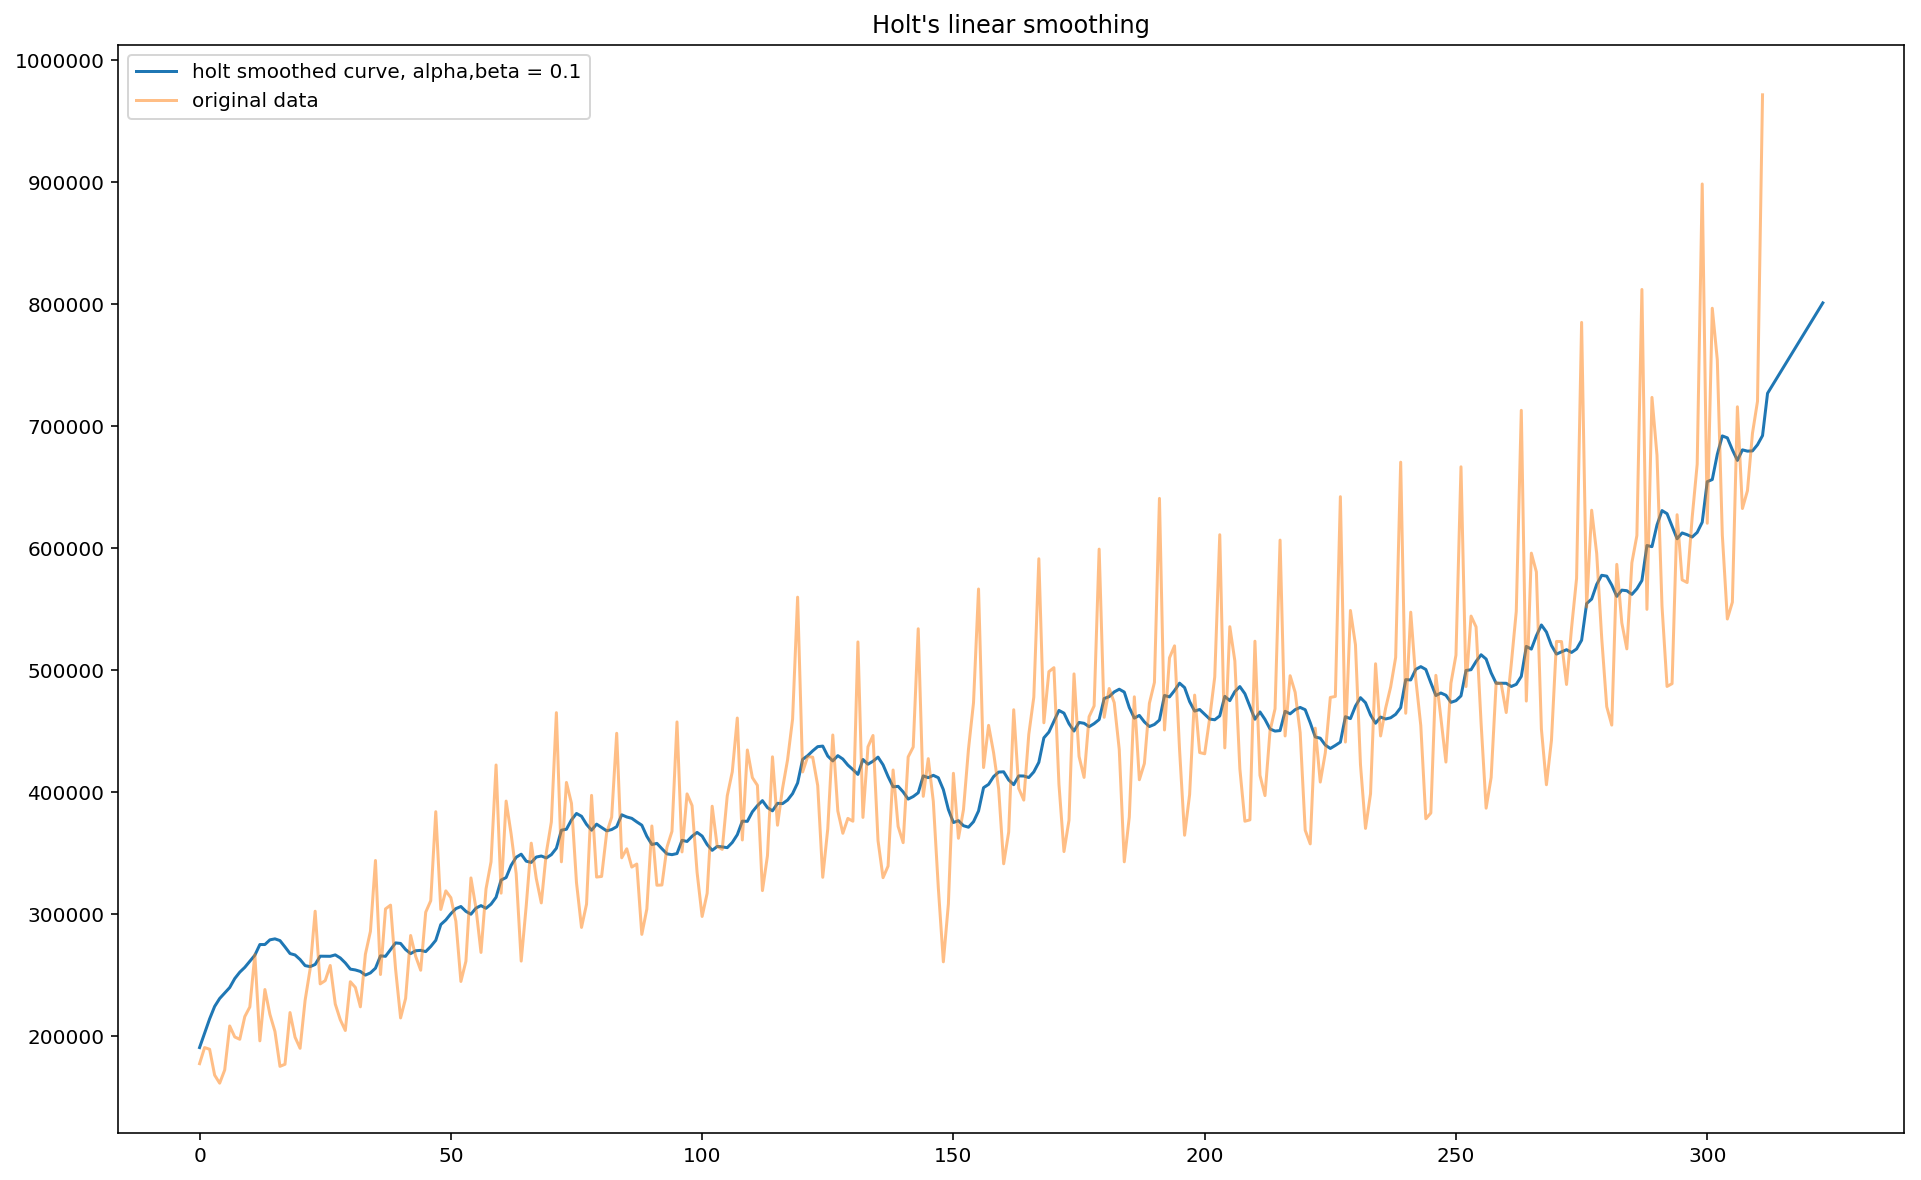

In [30]:
# plot your smoothed result
fig = plt.figure(figsize = (16, 10))
plt.plot(holtsforecast_manual, label = "holt smoothed curve, alpha,beta = 0.1")
plt.plot(y, alpha = 0.5, label="original data")
plt.legend()
plt.title("Holt's linear smoothing");

For smoothing case, we will set smoothing result with the current level, that is:
$$
\widehat{Y_{T}}=l_{t}
$$
the corresponding code is:

In [31]:
# if you are focusing on smoothing, then use the below code:
# Reset l,b
l = [y[0]]
b = [y[1] - y[0]]

holtsmoothed_manual = []
Y = y.tolist()

# forecast the data
for i in range(len(y)):
    l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i])) # Calculating l[1], l[2], etc.
    b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i]) # Calculating b[1], b[2], etc.
    # for smoothing,
    # Y^1 = l1 + b1
    # Y^2 = l2 + b2
    # ... 
    # Y^t = lt + bt
    holtsmoothed_manual.append(l[i+1])

Ploting the smoothing results:

Text(0.5, 1.0, "Holt's linear smoothing")

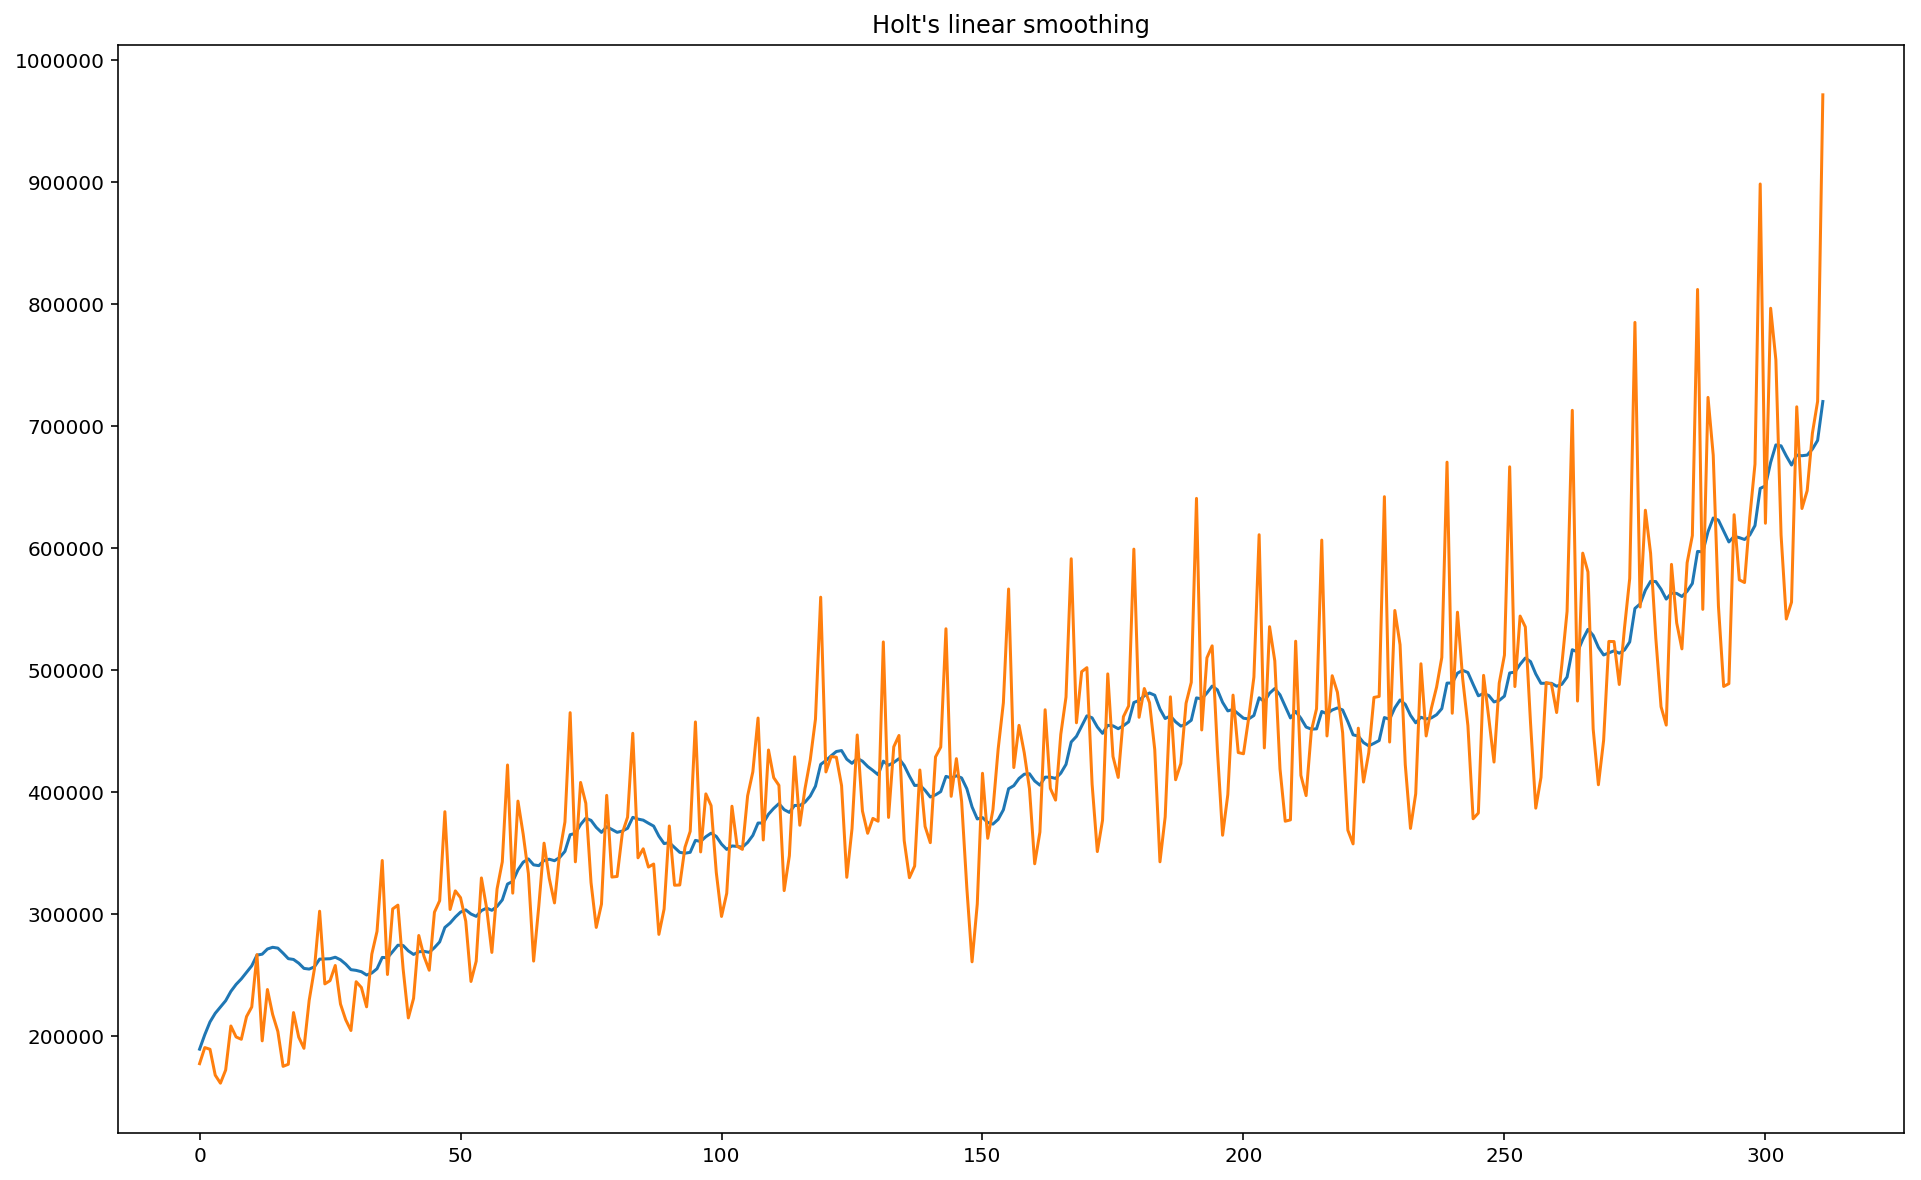

In [33]:
plt.figure(figsize = (16, 10))
plt.plot(holtsmoothed_manual[:], label = "holt smoothed curve, alpha,beta = 0.1")
plt.plot(y, label="original data")
plt.title("Holt's linear smoothing");

You could change another value of alpha and beta (i.e. 0.9), and then compare your new results with this one.
Note:
1. Pandas does not have a functionality of Holt’s linear trend exponential smoothing
2. There is a full set of functionalities of all the Holtwinters smoothing in statsmodels package, see https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
3. A good online tutorial is https://machinelearningmastery.com/exponentialsmoothing-for-time-series-forecasting-in-python/